In [297]:
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_city

## Pure State Samplers

In [ ]:
## ???

## Samplers of the Density Matrix

In [158]:
def GinibreRandomMatrix(N):
    return np.random.normal( size = ( N, N ) ) + 1j * np.random.normal( size = ( N, N ) )

In [159]:
def depurate(mat):
    return np.array([[mat[0,0].real, mat[0, 1]], [mat[1,0], mat[1,1].real]])

In [197]:
def purity(ρ):
    return ρ.dot(ρ.conj().T).trace().real

In [160]:
def HaarRandomMatrix(N):
    GinibreMatrix = GinibreRandomMatrix(N)
    X = GinibreMatrix.dot(GinibreMatrix.conj().T)
    return X / np.trace(X)

In [270]:
def _HaarRandomMatrix(N):
    GinibreMatrix = GinibreRandomMatrix(N)
    Q, R = linalg.qr(GinibreMatrix)
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(N)])
    X = Q.dot(Lambda)
    print(X)
    return X

In [278]:
def BuresRandomMatrix(N):
    UnitaryMatrix = stats.unitary_group.rvs(N)
    GinibreMatrix = GinibreRandomMatrix(N)
    U = (1 + UnitaryMatrix)
    X = U.dot(GinibreMatrix)
    X = X.dot(X.conj().T)
    return X / np.trace(X)

In [298]:
G1 = GinibreRandomMatrix(2)
G1

array([[-0.11130396-0.49926057j,  1.57575928-1.72937543j],
       [-0.81544236+1.49098068j, -0.04379455-0.18492476j]])

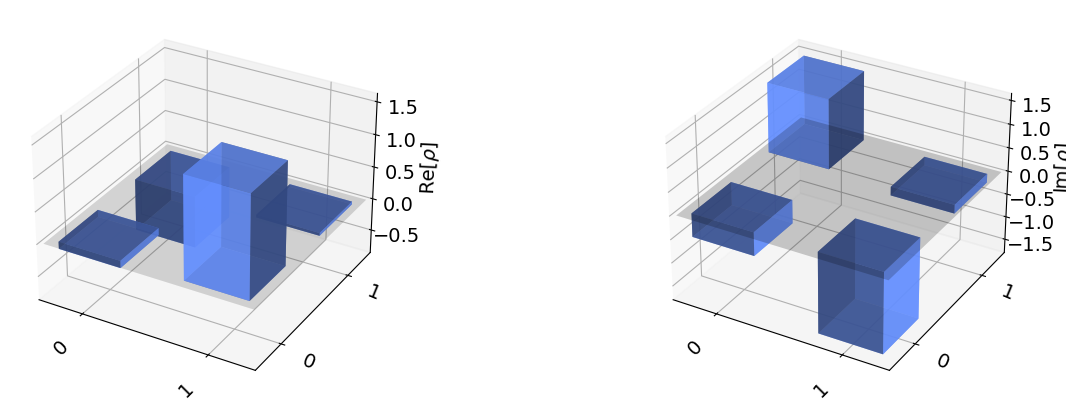

In [305]:
plot_state_city(G1, alpha=0.75)

In [300]:
H1 = HaarRandomMatrix(2)
H1

array([[0.51692397-8.33759471e-18j, 0.02592374+4.12773893e-01j],
       [0.02592374-4.12773893e-01j, 0.48307603+8.33759471e-18j]])

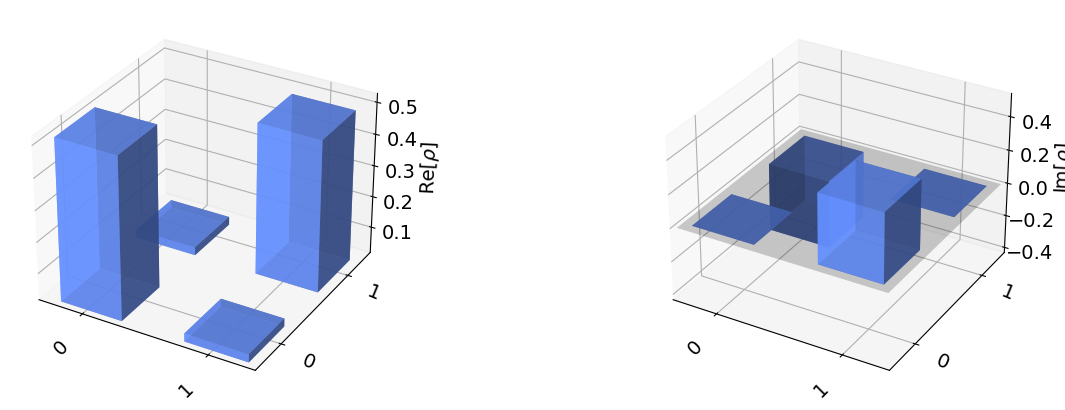

In [306]:
plot_state_city(H1, alpha=0.75)

In [302]:
B1 = BuresRandomMatrix(2)
B1

array([[0.34773888-4.52255869e-18j, 0.23949577-2.79793753e-01j],
       [0.23949577+2.79793753e-01j, 0.65226112+4.52255869e-18j]])

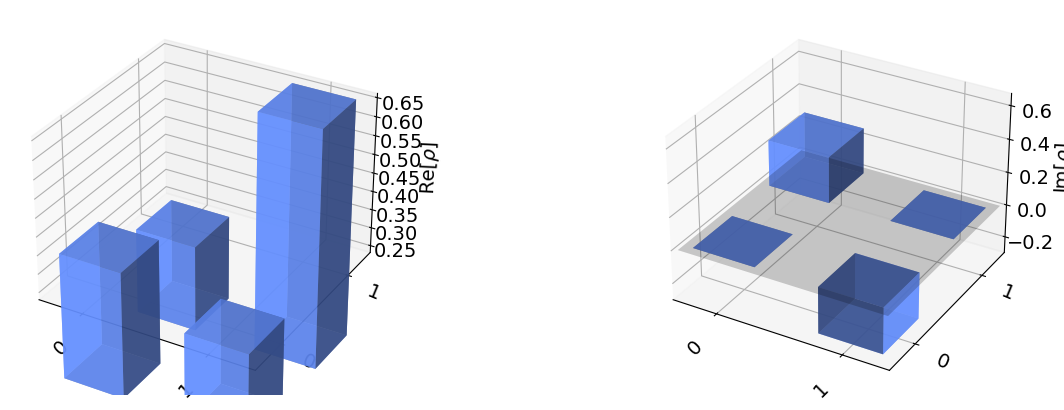

In [307]:
plot_state_city(B1, alpha=0.75)

## Measurement of the Density Matrix

In [114]:
def measure(ρ):
    x = np.trace(np.dot(ρ, σx)).real
    y = np.trace(np.dot(ρ, σy)).real
    z = np.trace(np.dot(ρ, σz)).real
    return [x, y, z]

In [202]:
def plot_bloch_sphere(bloch_vectors):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    # ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

In [203]:
I = np.eye(2)
σx = np.array([[0, 1], [1, 0]])
σy = np.array([[0, -1j], [1j, 0]])
σz = np.array([[1, 0], [0, -1]])

In [217]:
ρ = HaarRandomMatrix(2)
ρ

array([[ 0.09684891+8.23031556e-19j, -0.04193668-2.26363036e-01j],
       [-0.04193668+2.26363036e-01j,  0.90315109-8.23031556e-19j]])

In [218]:
purity(ρ)

0.9310594265371623

In [219]:
R = measure(ρ)
R

[-0.08387335681129361, 0.45272607269230297, -0.8063021866497286]

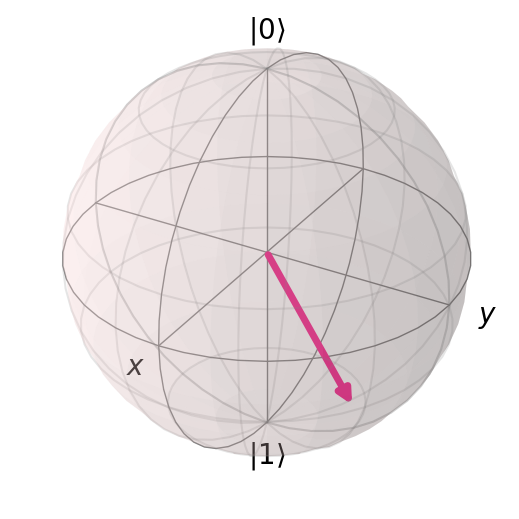

In [292]:
plot_bloch_vector(R)

## Sampling

In [280]:
nSamples = 2000

### Haar Measure

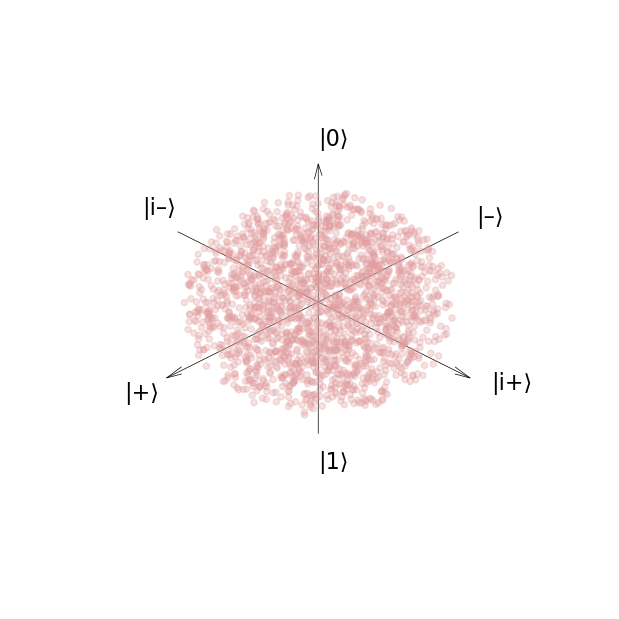

In [293]:
ρSamples = [HaarRandomMatrix(2) for _ in range(nSamples)]
measuredStates = np.array([measure(ρ) for ρ in ρSamples])
plot_bloch_sphere(measuredStates)

In [308]:
[np.linalg.norm(elm) for elm in measuredStates][:5]

[0.9508134082429239,
 0.8346915349421598,
 0.6919746559320921,
 0.7859609971223717,
 0.8875204866389721]

### Bures Measure

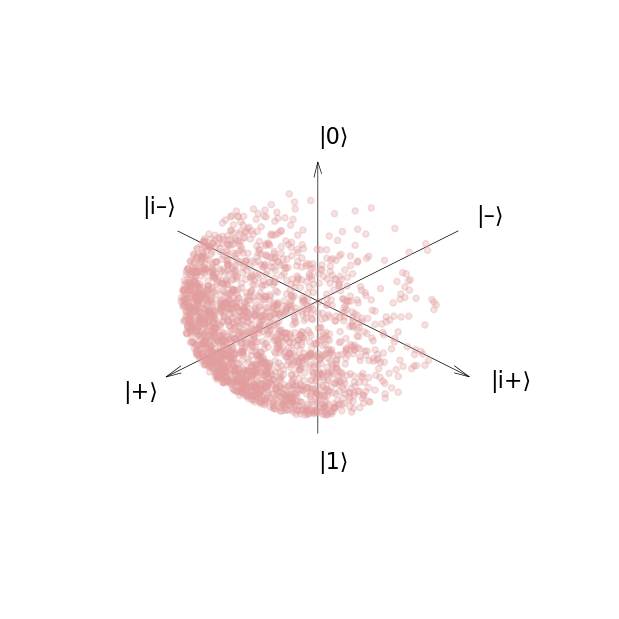

In [284]:
ρSamples = [BuresRandomMatrix(2) for _ in range(nSamples)]
measuredStates = np.array([measure(ρ) for ρ in ρSamples])
plot_bloch_sphere(measuredStates)

In [309]:
measuredStates[:5]

array([[ 0.48898908,  0.05821002, -0.81335565],
       [ 0.56714167,  0.58666559, -0.17573776],
       [-0.37432642,  0.50272252,  0.2932213 ],
       [ 0.55802462, -0.07168691, -0.54882074],
       [ 0.57990212,  0.53676632, -0.40408918]])